# Clustering ( Unsupervise Learning - Using PCA and Kmeans)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## The data set : Iris

A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.

Introductory Paper
The Iris data set: In search of the source of virginica
By A. Unwin, K. Kleinman. 2021

Published in Significance, 2021

Source: https://archive.ics.uci.edu/dataset/53/iris

In [15]:
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df = pd.read_csv(
    "/workspace/Machine-Learning-Studies/Unsupervise Learning/datasets/iris.data",
    names=cols
)

In [16]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


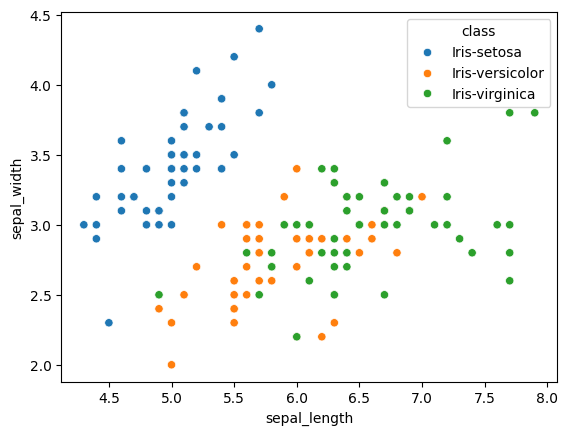

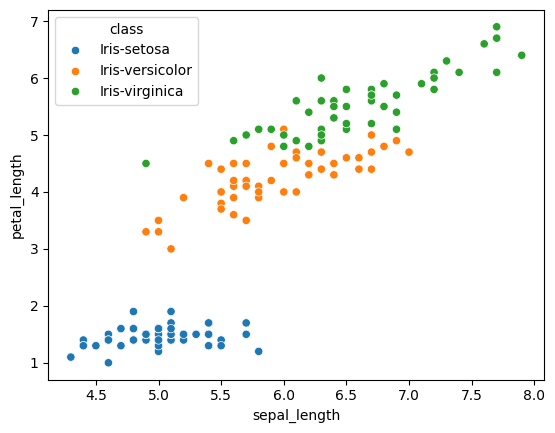

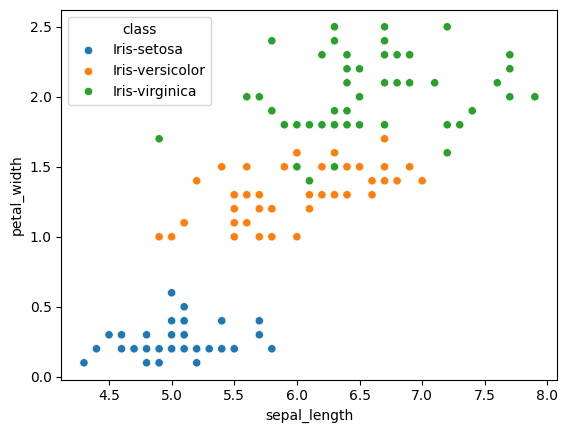

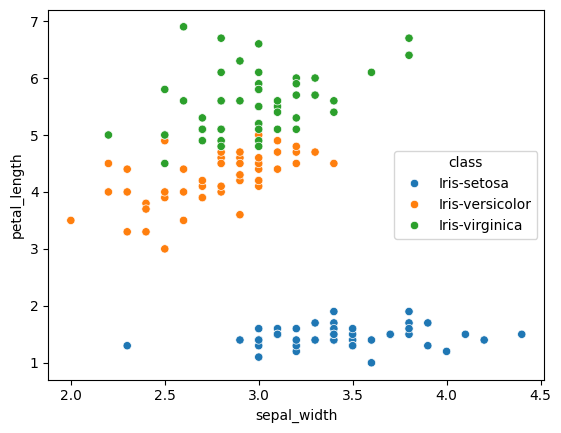

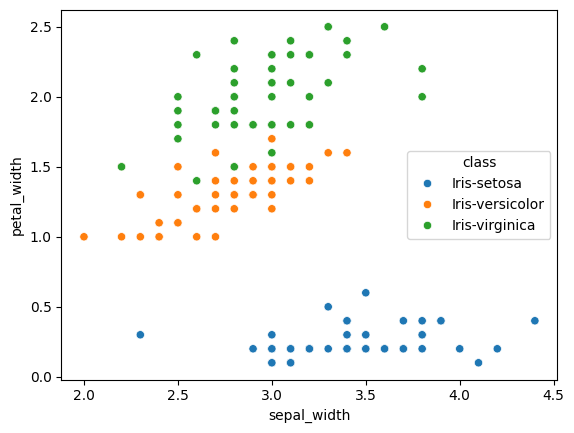

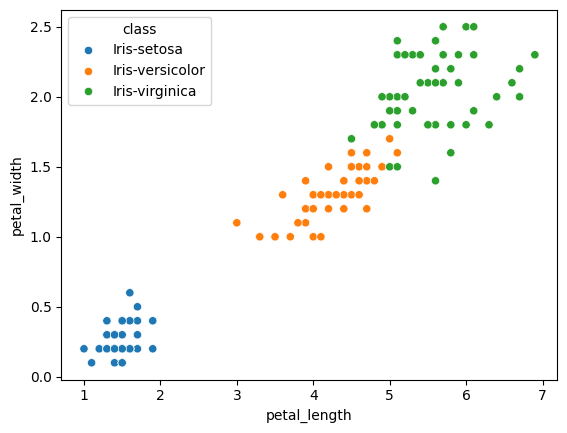

In [17]:
for i in range(len(cols)-1):
  for j in range(i+1, len(cols)-1):
    x_label = cols[i]
    y_label = cols[j]
    sns.scatterplot(x=x_label, y=y_label, data=df, hue='class')
    plt.show()

## Kmeans

In [18]:
from sklearn.cluster import KMeans

In [19]:
x = "petal_length"
y = "petal_width"
X = df[[x, y]].values

In [20]:
kmeans = KMeans(n_clusters = 3).fit(X)

In [21]:
clusters = kmeans.labels_

In [22]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y, "class"])

[]

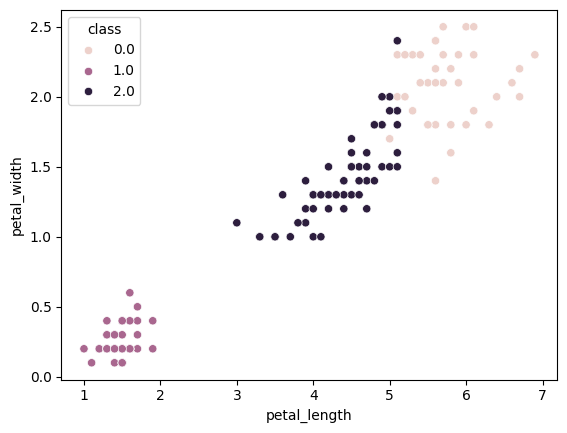

In [38]:
# K Means classes
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.plot()

## Kmeans ( With higher dimensions)

In [24]:
X = df[cols[:-1]].values

In [25]:
kmeans = KMeans(n_clusters = 3).fit(X)
cluster_df = pd.DataFrame(np.hstack((X, kmeans.labels_.reshape(-1, 1))), columns=df.columns)

[]

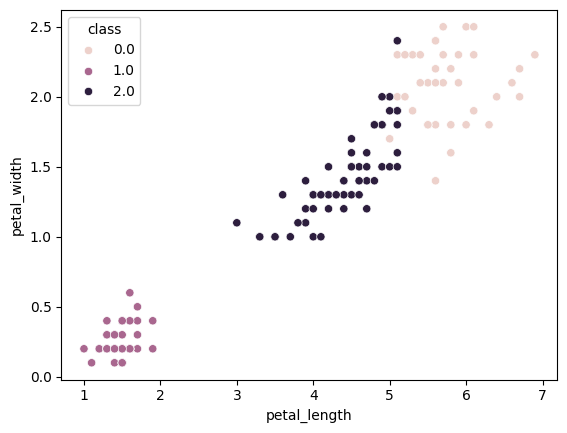

In [26]:
# K Means classes
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.plot()

[]

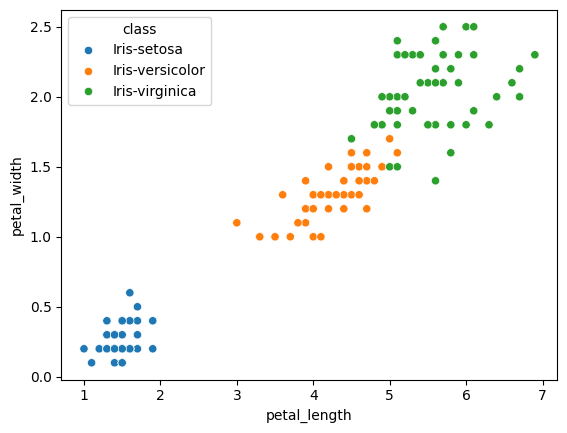

In [27]:
# Original classes
sns.scatterplot(x=x, y=y, hue='class', data=df)
plt.plot()

## PCA (Principal Component Analysis)

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

In [41]:
X.shape

(150, 4)

In [42]:
transformed_x.shape

(150, 2)

In [43]:
transformed_x[:5]

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456]])

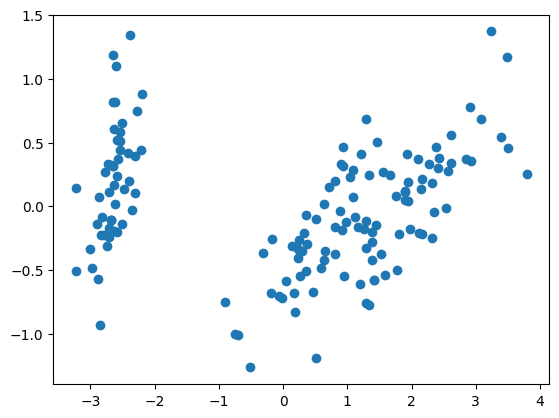

In [44]:
plt.scatter(transformed_x[:,0], transformed_x[:,1])
plt.show()

In [45]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1, 1))), columns=["pca1", "pca2", "class"])

In [46]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df["class"].values.reshape(-1, 1))), columns=["pca1", "pca2", "class"])

[]

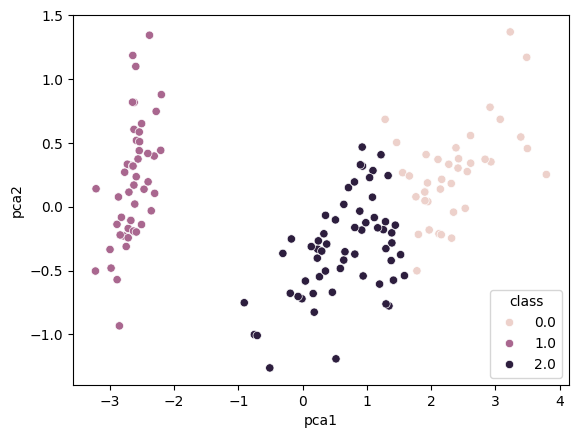

In [47]:
# K Means classes
sns.scatterplot(x="pca1", y="pca2", hue='class', data=kmeans_pca_df)
plt.plot()

[]

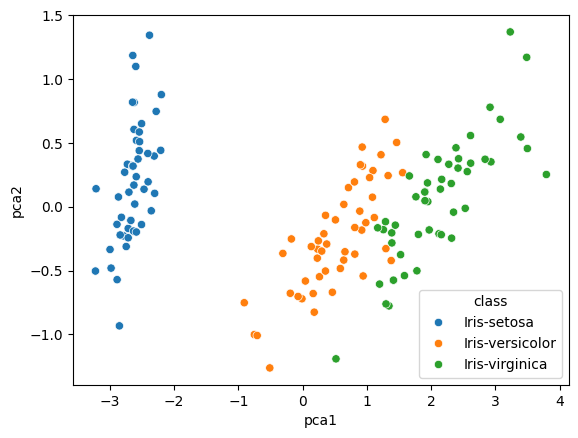

In [48]:
# Truth classes
sns.scatterplot(x="pca1", y="pca2", hue='class', data=truth_pca_df)
plt.plot()